<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [ ]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
print("The Total Number of rows : " +str(len(df)))

The Total Number of rows : 1436


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
# Outlier
numeric_col = df.select_dtypes(['float64','int64']).columns
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3-Q1
outlier = ((df[numeric_col] < (Q1 - 1.5 * IQR) ) | ((df[numeric_col] > (Q3 + 1.5 * IQR))))
print(outlier.shape)
#sns.boxplot(data = df[outlier])
#print(outlier.sum())



(1436, 10)


In [ ]:
remove_outlier = df[~((df[numeric_col] < (Q1 - 1.5 * IQR)) | ((df[numeric_col]>(Q3 + 1.5 * IQR)))).any(axis = 1)]
#sns.boxplot(remove_outlier)
print(remove_outlier.shape)

(1098, 11)


Histogram

<Axes: ylabel='Frequency'>

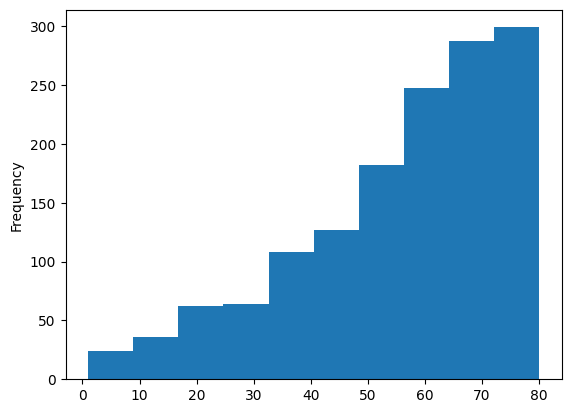

In [ ]:
df['Age_08_04'].plot.hist()

In [ ]:
# mean
print("Mean : ",df.mean(numeric_only=True))

Mean :  Price        10730.824513
Age_08_04       55.947075
KM           68533.259749
HP             101.502089
Automatic        0.055710
cc            1576.855850
Doors            4.033426
Cylinders        4.000000
Gears            5.026462
Weight        1072.459610
dtype: float64


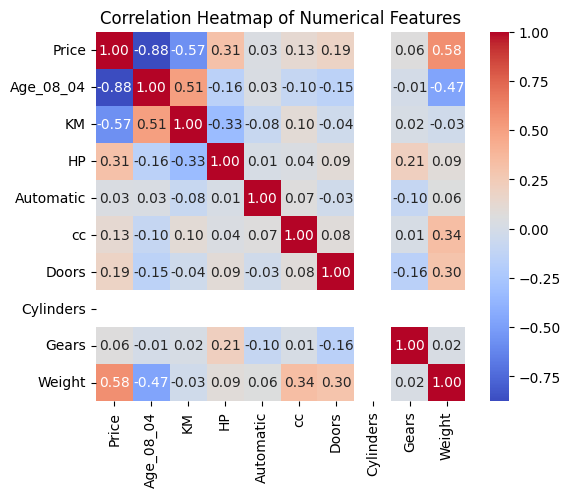

In [ ]:
# Correlation Metrics
corr = df.corr(numeric_only=True)

# plot heatmap
plt.Figure(figsize=(10,6))
sns.heatmap(corr, annot = True, fmt=".2f", cmap = "coolwarm", cbar = True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


**LabelEncoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])


In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [ ]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
x = df.drop('Price', axis=1)
y = df["Price"]

In [ ]:
x.shape

(1436, 10)

In [ ]:
y.shape

(1436,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.03,random_state=40)


Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

Model 1

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(x_train,y_train)

print("Intercept :",model1.intercept_)
print("Coefficients :",model1.coef_)


Intercept : -9670.322933413428
Coefficients : [-1.24578116e+02 -1.71787915e-02  6.11756357e+02  2.37077499e+01
  3.02526221e+02 -5.91165028e-02 -4.09607904e+01  3.06954462e-12
  6.27967385e+02  2.05954923e+01]


Model 2

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model2 = LinearRegression()
model2.fit(x_train_scaled,y_train)

print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)

Intercept: 10732.025143678158
Coefficients: [-2.32137739e+03 -6.43941168e+02  2.27321289e+02  3.55759744e+02
  6.95774922e+01 -2.53819142e+01 -3.90230665e+01  1.81898940e-12
  1.19034875e+02  1.08185330e+03]


Model 3

In [ ]:
selected_features = ['Age_08_04','KM','Weight','HP']
x_train_sub = x_train[selected_features]
x_test_sub = x_test[selected_features]

model3 = LinearRegression()
model3.fit(x_train_sub,y_train)

print("Intercept:", model3.intercept_)
print("Coefficients:", model3.coef_)

Intercept: -3652.455417040408
Coefficients: [-1.23133159e+02 -1.94381094e-02  1.81964559e+01  3.04753836e+01]


Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate(model, x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))

print("\nModel 1 Performance")
evaluate(model1, x_train, y_train, x_test,y_test)

print("\nModel 2 Performance (Standardized)")
evaluate(model2,x_train,y_train,x_test_scaled,y_test)

print("\nModel 3 Performance(selected Features)")
evaluate(model3, x_train_sub, y_train,x_test_sub,y_test)




Model 1 Performance
R2 Score: 0.8870650932145727
MSE: 1347160.2568576362

Model 2 Performance (Standardized)
R2 Score: 0.8870650932145754
MSE: 1347160.2568576047

Model 3 Performance(selected Features)
R2 Score: 0.8954014557975172
MSE: 1247718.7584037057


Apply Lasso and Ridge methods on the model

In [ ]:
from sklearn.linear_model import Lasso,Ridge

# Lasso
lasso = Lasso(alpha=0.1) # alpha controls regularization stregth
lasso.fit(x_train,y_train)

print("Lasso R²:", lasso.score(x_test, y_test))
print("Lasso Coefficients:", dict(zip(x.columns, lasso.coef_)))

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

print("Ridge R² : ", ridge.score(x_test, y_test))
print("Ridge Coefficients :", dict(zip(x.columns,ridge.coef_)))

Lasso R²: 0.8870934903990713
Lasso Coefficients: {'Age_08_04': np.float64(-124.57182942812847), 'KM': np.float64(-0.017184422943325336), 'Fuel_Type': np.float64(610.3584767807952), 'HP': np.float64(23.727718658164832), 'Automatic': np.float64(300.4926625838786), 'cc': np.float64(-0.059145194517501234), 'Doors': np.float64(-40.927063554824215), 'Cylinders': np.float64(0.0), 'Gears': np.float64(624.8671226816504), 'Weight': np.float64(20.59159757744562)}
Ridge R² :  0.8871619491372781
Ridge Coefficients : {'Age_08_04': np.float64(-124.5615202813683), 'KM': np.float64(-0.017198464574317517), 'Fuel_Type': np.float64(605.4797587301103), 'HP': np.float64(23.802895361833894), 'Automatic': np.float64(297.9412802984577), 'cc': np.float64(-0.059444517762096936), 'Doors': np.float64(-41.26366924164525), 'Cylinders': np.float64(0.0), 'Gears': np.float64(614.3366877365589), 'Weight': np.float64(20.57794448617686)}


Lasso :- Interpretation: Some coefficients may shrink to 0 → means those features are not contributing.

Ridge :- Interpretation: Coefficients shrink but usually none are exactly zero. Helps reduce overfitting.

Interview Questions:

1.   List item
2.   List item



1.What is Normalization & Standardization and how is it helpful?

Answer :

Normalization and standardization are feature scaling techniques to bring features to a common scale, helping algorithms converge faster and perform better by preventing features with larger ranges from dominating the model. Normalization scales data to a fixed range, typically, while standardization transforms data to a mean of 0 and a standard deviation of 1. Standardization is preferred for data following a Gaussian distribution and is more resistant to outliers, whereas normalization is suitable for any distribution and for algorithms sensitive to scale

Normalization

What it is: Scaling numerical data to a fixed range, most commonly between 0 and 1.

How it works: Uses the min-max scaling formula: (X - min(X)) / (max(X) - min(X)) to put all values in the dataset into the desired range.

When to use it: When you are unsure of the data's distribution or when the data does not follow a Gaussian distribution.

Helpful for: Algorithms that are sensitive to feature scales, such as K-Nearest Neighbors and neural networks.

Standardization

What it is: Transforms data to have a mean of 0 and a standard deviation of 1, also known as z-score scaling.

How it works: Uses the formula: (X - mean(X)) / standard deviation(X).

When to use it: When the data follows a Gaussian (or normal) distribution. It is also a good choice for handling outliers.

Helpful for: Algorithms that assume data is normally distributed, like Principal Component Analysis (PCA) and some linear models.

Why are they helpful?

Improved Model Performance: Prevents features with larger numerical ranges from disproportionately influencing the learning process.

Faster Convergence: Helps optimization algorithms like gradient descent converge more quickly by ensuring features are on a similar scale.

Better Interpretability: Makes it easier to interpret models by creating a common scale for all features.

Algorithm Requirements: Ensures that data meets the assumptions of certain algorithms that are sensitive to feature scale or distribution.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Answer :

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This makes coefficient estimates unstable and inflates their variances, which reduces interpretability.

There are several ways to handle this problem:

Detect it using VIF (Variance Inflation Factor). If a feature has a VIF above 10, it usually indicates problematic multicollinearity.

Remove one of the correlated variables. If two predictors contain the same information, dropping one reduces redundancy.

Use dimensionality reduction techniques like PCA, which transform correlated features into uncorrelated principal components.

Apply regularization. Ridge Regression (L2 penalty) shrinks coefficients of correlated variables, while Lasso Regression (L1 penalty) can even eliminate some variables entirely.

In practice, I usually start by checking VIF, then decide whether to drop features or switch to Ridge/Lasso depending on the business requirement — whether interpretability or prediction accuracy is more important.